4422102/4422102 [==============================] - 0s 0us/step


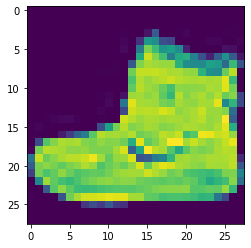

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, x_test), (y_train, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

- 가장자리 검출(소벨필터)

In [3]:
# 필터정의
import numpy as np
import cv2

horizontal_filter = np.array([[1.,2.,1.],
                              [0.,0.,0.],
                              [-1.,-2.,-1.]])
vertical_filter = np.array([[1.,0.,1.],
                              [2.,0.,-2.],
                              [1.,0.,-1.]])

In [7]:
# 이미지 사이즈 줄이기
test_image = cv2.resize(x_train[0],(27,27))
image_size = test_image.shape[0]
output_size = int((image_size-3)/1+1)
print('output의 크기 :', output_size)

output의 크기 : 25


In [20]:
# 필터적용
filter_size = 3
def get_filtered_image(filter):
  filtered_image = np.zeros((output_size, output_size))
  for i in range(output_size):
    for j in range(output_size):
      indice_image = test_image[i:(i+filter_size),
                                j:(j+filter_size)] * filter
      indice_sum = np.sum(indice_image)
      if indice_sum > 255:
        indice_sum = 255
      filtered_image[i,j] = indice_sum
  return filtered_image                          

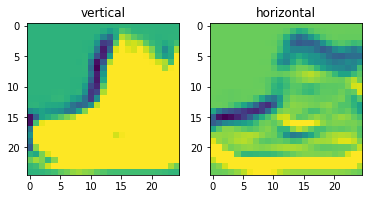

In [21]:
vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1,2,1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1,2,2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

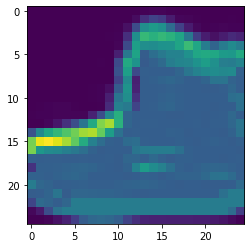

In [24]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image)+
                      np.square(vertical_filtered_image))
plt.imshow(sobel_image)

CNN의 컨볼루션 필터는 이미지 필터처럼 직접 정의할 필요없이 학습에 의해 적절히 조정됩니다.

- 풀링 연산 구현

4422102/4422102 [==============================] - 0s 0us/step
original image shape : (28,28)
pooled image shape: (14,14)


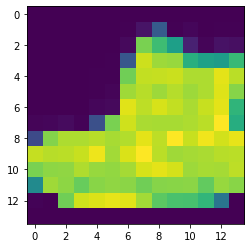

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, x_test),(y_train, y_test) = load_data()

img = x_train[0]
img_x = img.shape[0]
img_y = img.shape[1]
new_img_x = int(img_x/2)
new_img_y = int(img_y/2)

pooled_img = np.zeros((new_img_x,new_img_y))

print(f'original image shape : ({img_x},{img_y})')
print(f'pooled image shape: ({new_img_x},{new_img_y})')

for x in range(0, img_x, 2):
  for y in range(0, img_y, 2):
    pooled_img[int(x/2), int(y/2)] = np.max(img[x:x+2, y:y+2])

plt.imshow(pooled_img)